In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\amits\Downloads\Sleep_health_and_lifestyle_dataset.csv")

In [3]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
# Data Preprocessing

In [5]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [6]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

The nan value stands for No sleep disorder for sleep disorder column so we can fill it with 'None'

In [7]:
df['Sleep Disorder'].fillna('None', inplace = True)

C:\Users\amits\AppData\Local\Temp/ipykernel_21572/618552071.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep Disorder'].fillna('None', inplace = True)


In [8]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [9]:
df.drop('Person ID', axis=1, inplace = True)

In [10]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


In [12]:
df[['Systolic Pressure', 'Diastolic Pressure']] = df['Blood Pressure'].str.split('/', expand = True).astype(int)

In [13]:
df.drop('Blood Pressure', axis = 1, inplace = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           374 non-null    object 
 11  Systolic Pressure        374 non-null    int32  
 12  Diastolic Pressure       374 non-null    int32  
dtypes: float64(1), int32(2), int64(6), object(4)
memory usage: 35.2+ KB


In [15]:
# Handling Categoical Variable Occupation

In [16]:
df['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [17]:
counts = df['Occupation'].value_counts()
threshold = 30
repl = counts[counts<=threshold].index
df['Occupation'] = df['Occupation'].replace(repl, 'others')

In [18]:
# df = pd.concat([df, new_df], axis=1)

In [19]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure
0,Male,27,others,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,others,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,others,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [20]:
# df.drop('Occupation', axis=1, inplace=True)

In [21]:
df['BMI Category'].value_counts()

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

Here 'Normal weight' and 'Normal' both are same so we can replace 'normal weight' with 'Normal' and make it one category

In [22]:
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

In [23]:
df.sample(5)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure
17,Male,29,Doctor,6.0,6,30,8,Normal,70,8000,Sleep Apnea,120,80
112,Female,37,Accountant,7.2,8,60,4,Normal,68,7000,None,115,75
173,Male,41,Lawyer,7.7,8,90,5,Normal,70,8000,None,130,85
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
208,Male,43,Engineer,7.7,8,90,5,Normal,70,8000,None,130,85


In [24]:
# Exploratory data analysis

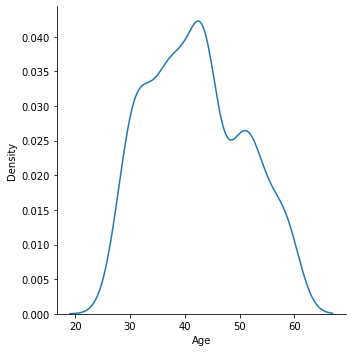

In [25]:
# plotting Distribution of Age
sns.displot(df['Age'], kind = 'kde')

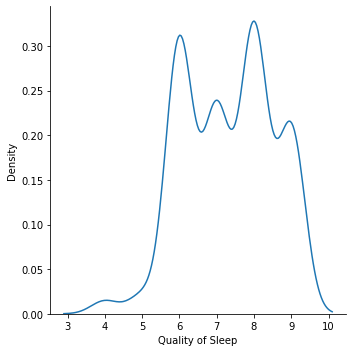

In [26]:
sns.displot(df['Quality of Sleep'], kind = 'kde')

<Axes: xlabel='Gender', ylabel='Age'>

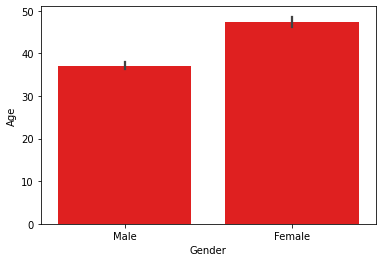

In [27]:
sns.barplot(x = df['Gender'], y = df['Age'], color = 'red')

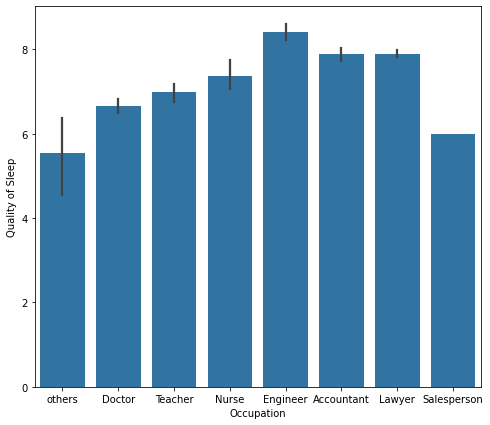

In [28]:
plt.figure(figsize = (8,7))
sns.barplot(x = df['Occupation'], y=df['Quality of Sleep'])
plt.show()

C:\Users\amits\AppData\Local\Temp/ipykernel_21572/2402595778.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.barplot(y = df['Sleep Duration'], x=df['Sleep Disorder'], color = 'red', hue =df['Gender'])
C:\Users\amits\anaconda3\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\amits\anaconda3\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


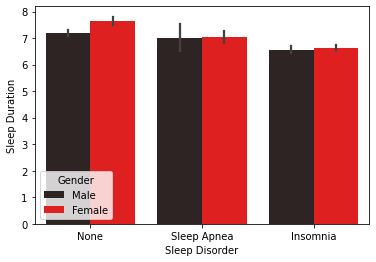

In [29]:
sns.barplot(y = df['Sleep Duration'], x=df['Sleep Disorder'], color = 'red', hue =df['Gender'])
plt.show()

We can see there is no such impact 

C:\Users\amits\anaconda3\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\amits\anaconda3\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Sleep Disorder', ylabel='Age'>

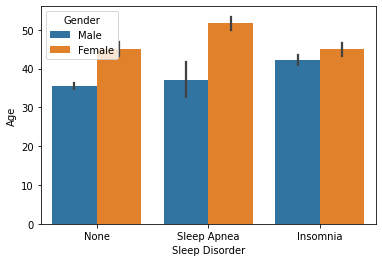

In [30]:
sns.barplot(x =df['Sleep Disorder'], y=df['Age'], hue =df['Gender'])

We can observe Females who have more age are more likely to have sleep disorder than males

C:\Users\amits\anaconda3\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\amits\anaconda3\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\amits\anaconda3\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\amits\anaconda3\lib\site-packages\seaborn\_base.py:948: FutureWa

<Axes: xlabel='Sleep Disorder', ylabel='count'>

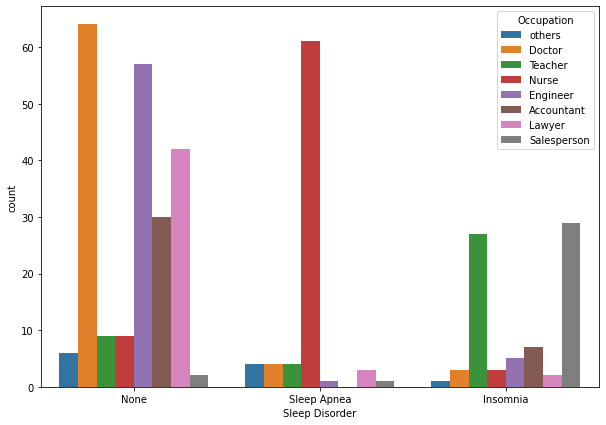

In [31]:
plt.figure(figsize = (10,7))
sns.countplot(x =df['Sleep Disorder'], hue =df['Occupation'])

We can observe from plot that high no. of Nurses are having Sleep apnea sleep disorder then salesperson are having insomania followed by teacher than rest of other categories, We can observe that occupation has great impact on sleep disorder

C:\Users\amits\anaconda3\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\amits\anaconda3\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Sleep Disorder', ylabel='Stress Level'>

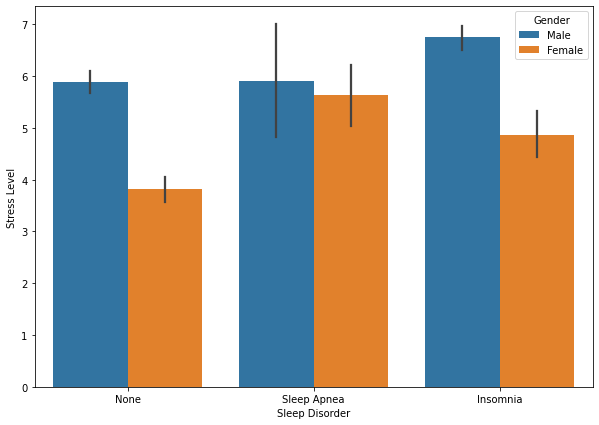

In [32]:
plt.figure(figsize = (10,7))
sns.barplot(x =df['Sleep Disorder'], y = df['Stress Level'],hue =df['Gender'])

From above plot we can observe that 'Stress Level' has impact with 'Insomania' Specially for male category

C:\Users\amits\anaconda3\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\amits\anaconda3\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\amits\anaconda3\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Sleep Disorder', ylabel='count'>

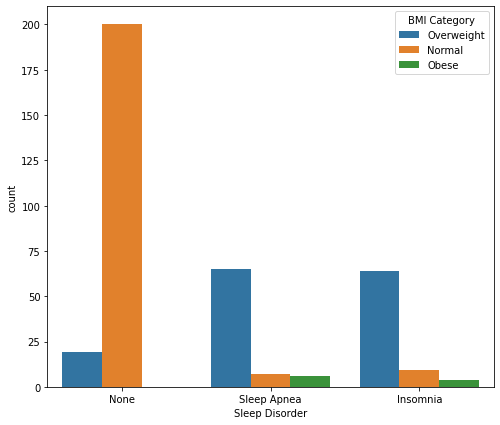

In [33]:
plt.figure(figsize = (8,7))
sns.countplot( x = df['Sleep Disorder'], hue = df['BMI Category'])

From above plot we can understand that BMI category has an impact on sleep disorder than other, overweight people have sleep disorder than normal and obese.

C:\Users\amits\AppData\Local\Temp/ipykernel_21572/2603537574.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.stripplot(x = df['Quality of Sleep'], y = df['Age'], color = 'red', jitter = 0.2, hue = df['Gender'])
C:\Users\amits\anaconda3\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Quality of Sleep', ylabel='Age'>

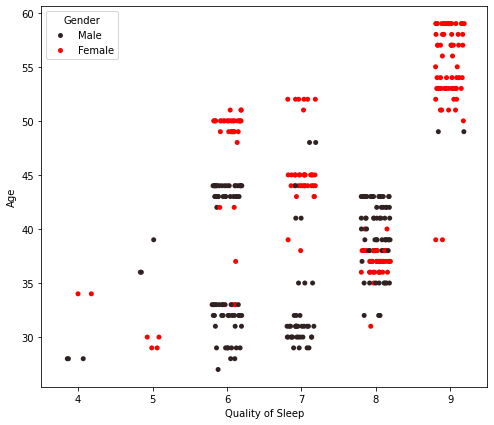

In [34]:
# Plotting Scatterplot between Age and Quality of Sleep
plt.figure(figsize = (8,7))
sns.stripplot(x = df['Quality of Sleep'], y = df['Age'], color = 'red', jitter = 0.2, hue = df['Gender'])

<Axes: xlabel='Sleep Disorder'>

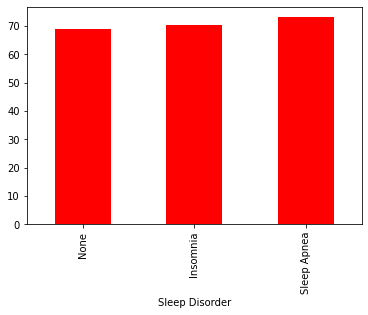

In [35]:
df.groupby('Sleep Disorder')['Heart Rate'].mean().sort_values(ascending = True).plot(kind = 'bar', color = 'red')

In [36]:
# Feature Engineering Using ordinal Encoder, One Hot Encoder, Label Encoder

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
# import column transformer
from sklearn.compose import ColumnTransformer

In [38]:
y = df['Sleep Disorder']

In [39]:
x = df.drop('Sleep Disorder', axis=1)

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 10)

In [41]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [42]:
x_train

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic Pressure,Diastolic Pressure
195,Male,43,Salesperson,6.5,6,45,7,Overweight,72,6000,130,85
215,Male,43,Engineer,7.8,8,90,5,Normal,70,8000,130,85
36,Male,31,Doctor,6.1,6,30,8,Normal,72,5000,125,80
10,Male,29,Doctor,6.1,6,30,8,Normal,70,8000,120,80
61,Male,32,Doctor,6.0,6,30,8,Normal,72,5000,125,80
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,140,95
320,Female,53,Engineer,8.5,9,30,3,Normal,65,5000,125,80
15,Male,29,Doctor,6.0,6,30,8,Normal,70,8000,120,80
125,Female,37,Nurse,7.5,8,60,4,Normal,70,8000,120,80


In [43]:
# One hot Encoding
trans = ColumnTransformer(transformers = [
    ('tnf1',OneHotEncoder(sparse = False,handle_unknown = 'ignore'),['Gender','Occupation']),
    ('tnf2',OrdinalEncoder(categories=[['Normal','Overweight','Obese']]),['BMI Category']),
], remainder='passthrough')

In [44]:
x_train = trans.fit_transform(x_train)
x_test = trans.transform(x_test)

C:\Users\amits\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [54]:
# Importing Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier
trf3 = RandomForestClassifier()

In [55]:
# Creating Pipeline
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('trf3',trf3)
])

In [56]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('trf3', RandomForestClassifier())])

In [57]:
y_pred = pipe.predict(x_test)

In [58]:
from sklearn.metrics import r2_score, accuracy_score

In [59]:
acc=accuracy_score(y_pred, y_test)
print('Accuracy Score of model is:',acc)

Accuracy Score of model is: 0.9026548672566371


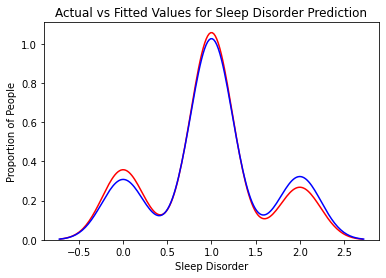

In [60]:
ax = sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(y_pred, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Sleep Disorder Prediction')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion of People')
plt.show()

In [61]:
import pickle

In [62]:
pickle.dump(pipe, open("sleepdisorder.pkl","wb"))